# One Piece Season 2: Sentiment-Led Marketing Strategy & Character Rollout Insights

## Background & Project Objectives

### I. Background

In 2023, Netflix released the live-action adaptation of One Piece. Despite initial skepticism fueled by the historical failure of anime-to-live-action projects, the series became a critical and commercial success, securing an 86% Rotten Tomatoes score and an 8.3/10 IMDb rating.

Following this success, Season II is scheduled for release on March 10th, 2026. To ensure a successful rollout, this analysis bridges the gap between past performance and future engagement.

### II. Objectives

1. Retrospective Sentiment Analysis: Evaluate viewer reception of Season I via IMDb and Rotten Tomatoes, specifically quantifying the "demand ratio" for Season II.
2. Trailer Engagement Mapping: Analyze audience reactions to the recent Season II trailer by cross-referencing YouTube Like counts with character-specific keyword frequencies.
3. Strategic Recommendations: Develop a data-backed marketing and promotional roadmap for the Season II launch based on identified "Hype Engines" and "Risk Factors.

In [ ]:
# Load necessary libraries

import pandas as pd
import numpy as np
import pandasql as ps
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns 

## Load Datasets - IMDb and Rotten Tomatoes (Season I)

In [104]:
one_piece_imdb_df = pd.read_csv("one_piece_imdb_df_cleaned.csv")
one_piece_rt_df = pd.read_csv("one_piece_rt_df_cleaned.csv")

In [105]:
one_piece_imdb_df.head(4)

,review_dates,ratings,review_titles,reviews,vader_score_title,vader_score_review,vader_sentiment_title,vader_sentiment_review,source
0,2023-09-04,9.0,Not My Kind of Show. But This I Loved.,I'm a 60yo man & old school like the The Marin...,0.7469,0.9941,Positive,Positive,IMDb.com
1,2023-09-04,8.0,Never seen the anime and still enjoyed it,I have to admit that I've never watched any of...,0.5106,0.9200,Positive,Positive,IMDb.com
2,2023-08-31,9.0,The live action curse breaker,Despite the negative reviews from some people ...,-0.5423,0.9806,Negative,Positive,IMDb.com
3,2023-08-31,10.0,WE WANT SEASON 2,"Being a one piece fan myself, I was a bit inse...",0.2577,0.9885,Positive,Positive,IMDb.com


In [106]:
one_piece_rt_df.head(4)

,review_dates,reviews,vader_score_review,vader_sentiment_review,source
0,2026-12-20,One of the best manga adaptations of all time....,0.8402,Positive,Rotten Tomatoes
1,2026-12-06,Best Anime Live Action Adaptation of All Time....,0.6696,Positive,Rotten Tomatoes
2,2026-11-30,How were they able to cram so much cringe into...,0.4601,Positive,Rotten Tomatoes
3,2026-10-27,One Piece is an incredibly well done show. It ...,0.9817,Positive,Rotten Tomatoes


## Preparation for EDA

### I. Separate IMDb Dataframe to 2 - Title & Reviews

In [ ]:
# Regarding IMDb, both titles and reviews will create meaningful insights
# Hence, I've decided to divide IMDb df into 2 separate dfs - Titles and Reviews
# For IMDb Review df, will be merged with Rotten Tomatoes

one_piece_imdb_title_df = ps.sqldf("select [review_dates], [review_titles], [vader_score_title], [vader_sentiment_title], [source] from one_piece_imdb_df")

one_piece_imdb_review_df = ps.sqldf("select [review_dates], [reviews], [vader_score_review], [vader_sentiment_review], [source] from one_piece_imdb_df")

### II. Merge IMDb Review DF and Rotten Tomatoes DF

In [108]:
# Check row numbers before merging

print(len(one_piece_imdb_review_df), len(one_piece_rt_df))

1056 1210


In [109]:
# Once separation is done, merge them into one df

one_piece_imdb_rt_reviews_df = pd.concat([one_piece_imdb_review_df, one_piece_rt_df])

In [110]:
# Check if they are merged without any issue

one_piece_imdb_rt_reviews_df.info()

print(one_piece_imdb_rt_reviews_df['source'].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 2266 entries, 0 to 1209
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   review_dates            2266 non-null   object 
 1   reviews                 2266 non-null   object 
 2   vader_score_review      2266 non-null   float64
 3   vader_sentiment_review  2266 non-null   object 
 4   source                  2266 non-null   object 
dtypes: float64(1), object(4)
memory usage: 106.2+ KB
['IMDb.com' 'Rotten Tomatoes']


In [111]:
# Also, double check if there's any missing value

def missing_values(df):
    column_list = df.columns
    for c in column_list:
        missing = df[c].isnull().sum()
        print(f"There are {missing} missing values in {c}")

missing_values(one_piece_imdb_rt_reviews_df)

There are 0 missing values in review_dates
There are 0 missing values in reviews
There are 0 missing values in vader_score_review
There are 0 missing values in vader_sentiment_review
There are 0 missing values in source


In [112]:
# Check if there's any duplicated values to make sure

duplicated = one_piece_imdb_rt_reviews_df[one_piece_imdb_rt_reviews_df.duplicated(keep=False)]

duplicated

# It's confirmed that data is clean, proceeding to EDA

,review_dates,reviews,vader_score_review,vader_sentiment_review,source


## EDA

### Audience Sentiment Ratio on One Piece Season I

In [ ]:
# First, I will check how overall audience from both IMDb and Rotten Tomatoes felt about One Piece Season I

one_piece_overall_sentiment_df = pd.DataFrame(one_piece_imdb_rt_reviews_df.groupby('vader_sentiment_review')['vader_score_review'].count().reset_index().rename(columns={'vader_sentiment_review': 'sentiments', 'vader_score_review': 'counts'}))

one_piece_overall_sentiment_df['percentage'] = 100*(one_piece_overall_sentiment_df['counts']/one_piece_overall_sentiment_df['counts'].sum())

one_piece_overall_sentiment_df['platforms'] = 'Overall'

one_piece_overall_sentiment_df = ps.sqldf("SELECT [platforms], [sentiments], [counts], [percentage] FROM one_piece_overall_sentiment_df")

one_piece_overall_sentiment_df

,platforms,sentiments,counts,percentage
0,Overall,Negative,175,7.722860
1,Overall,Neutral,94,4.148279
2,Overall,Positive,1997,88.128861


In [ ]:
# Then, I will explore sentiments by each platform

platform_sentiment_ratio_df = pd.DataFrame(one_piece_imdb_rt_reviews_df.groupby(['source', 'vader_sentiment_review'])['vader_score_review'].count().reset_index().rename(columns={'source': 'platforms', 'vader_sentiment_review': 'sentiments', 'vader_score_review': 'counts'}))

platform_sentiment_ratio_df['percentage'] = 100*(platform_sentiment_ratio_df['counts']/platform_sentiment_ratio_df.groupby('platforms')['counts'].transform('sum'))

In [115]:
platform_sentiment_ratio_df

,platforms,sentiments,counts,percentage
0,IMDb.com,Negative,72,6.818182
1,IMDb.com,Neutral,3,0.284091
2,IMDb.com,Positive,981,92.897727
3,Rotten Tomatoes,Negative,103,8.512397
4,Rotten Tomatoes,Neutral,91,7.520661
5,Rotten Tomatoes,Positive,1016,83.966942


In [116]:
# Now, let's merge them together

sentiment_ratio_df = pd.concat([one_piece_overall_sentiment_df, platform_sentiment_ratio_df])

In [117]:
def ratio_pie(platforms):
    platform_sentiment = sentiment_ratio_df[sentiment_ratio_df["platforms"] == platforms]

    colors = sns.color_palette('pastel', len(platform_sentiment))

    plt.pie(platform_sentiment["percentage"],
            labels=platform_sentiment["sentiments"],
            colors=colors,
            autopct="%.0f%%")
    
    plt.title(f"Sentiment Distribution — {platforms}")
    plt.show()

In [118]:
interact(ratio_pie, platforms=list(sentiment_ratio_df["platforms"].unique()))

interactive(children=(Dropdown(description='platforms', options=('Overall', 'IMDb.com', 'Rotten Tomatoes'), va…

<function __main__.ratio_pie(platforms)>

As this shows, about 88% of audience had positive sentiments on One Piece Season I (IMDb: 93% Positive, Rotten Tomatoes: 84%).

## Frequency of Mentioning Hopes to Release Season II

In [119]:
# Let's check how many viewers mentioned keywords related to Season II

query = """
SELECT op1.[source], COUNT(*) AS hope_s2_count, ROUND((100.0*COUNT(*)/(SELECT COUNT(*) FROM one_piece_imdb_rt_reviews_df op2 WHERE op1.[source] = op2.[source] GROUP BY op2.[source])), 1) AS percentage
FROM one_piece_imdb_rt_reviews_df op1
WHERE [reviews] LIKE '%season 2%'
   OR [reviews] LIKE '%season II%'
   OR [reviews] LIKE '%wait%'
   OR [reviews] LIKE '%forward to%'
GROUP BY op1.[source]
"""

s2_hope_df = ps.sqldf(query)

In [120]:
s2_hope_df

,source,hope_s2_count,percentage
0,IMDb.com,301,28.5
1,Rotten Tomatoes,180,14.9


A keyword analysis focusing on Active Demand—tracking terms like 'Season 2', 'wait', and 'forward to'—reveals a powerful appetite for a sequel. Specifically, 28.5% of IMDb reviewers and 14.9% of Rotten Tomatoes users have already transitioned from passive viewers to vocal advocates for Season II.

When paired with the overwhelming Positive Sentiment (92.8% on IMDb), these figures serve as a critical indicator for Subscriber Retention. By successfully building a core fanbase that is both satisfied and expectant, One Piece Season I has established a high 'Title-Level Value,' signaling that Season II will drive both continued loyalty and new subscriber acquisition upon its March 2026 release.

*Note: Due to query structure, replaced looking forward and can't wait to forward to and wait.

## Word Clouds & Keywords for One Piece Season 2 Trailer YouTube Comments

### I. Word Clouds

In [ ]:
# Now, I will discover keywords using word clouds

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
from nltk.corpus import stopwords

In [122]:
one_piece_yt_df = pd.read_csv("one_piece_yt_df_cleaned.csv")

In [123]:
one_piece_yt_df.head(4)

,review_dates,reviews,Likes,vader_score_review,vader_sentiment_review,source
0,2026-01-12,Chopper’s hiding skill has obviously been impr...,18073,0.2263,Positive,YouTube
1,2026-01-12,It's such a miracle that the show is allowed t...,16158,0.6908,Positive,YouTube
2,2026-01-12,We better have that one crocus gag with the dr...,14293,0.1280,Positive,YouTube
3,2026-01-12,Fully embracing and not shying away from the r...,8388,0.1174,Positive,YouTube


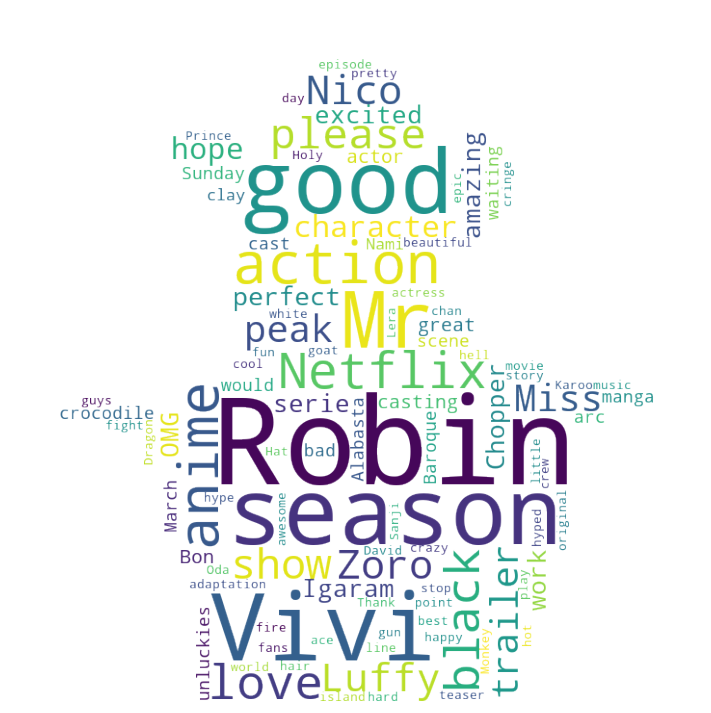

In [124]:
one_piece_yt_df['reviews'] = one_piece_yt_df['reviews'].replace(np.nan, '', regex=True)

reviews = ' '.join(one_piece_yt_df['reviews'])

stop = set(stopwords.words('english'))

custom_stopwords = ["think", "actually", "still", "never", 'got', 'way', 'also', 'gonna', 'already', 'going', 'know', 'shit',
                    'im', 'right', 'back', 'go', 'people', 'Let', 'got', 'fan', 'want', 'look', 'looks', 'first', 'need',
                    'LETS', 'cant', "can't", 'year', 'Oh', 'made', 'yes', 'really', 'much', 'god', 'keep', 'looking',
                    'everything', 'get', 'give', 'make', 'better', 'time', 'thing', 'watching', 'say', 'guy', 'u', 'man',
                    'ever', 'years', 'end', 'everyone', 'thought', 'que', 'us', 'take', 'Damn', 'finally', 'real',
                    'v', 'watched', 'wtf', 'many', 'seen', 'de', 'feel', 'vs', 'dont', 'believe', 'something', 'even', 'see',
                    'lol', 'Wow', 'things', 'well', 'bro', 'yeah', 'life', 'making', 'every', 'absolutely', 'makes',
                    'getting', 'la', 'wonder', 'long', 'come', 'watch', 'live', 'one', 'piece', 'like', 'wait']

extended_stopwords = stop.union(custom_stopwords)

mask1 = np.array(Image.open("robin_mask.png"))

mask1[mask1 == 0] = 255

one_piece_wordcloud = WordCloud(width=1200, height=700, max_words=100, stopwords=extended_stopwords, mask=mask1, background_color="rgba(255, 255, 255, 0)", mode="RGBA", collocations=False).generate(reviews)

one_piece_wordcloud.words_

# Display the generated image:
plt.figure(figsize=(9,9))
plt.imshow(one_piece_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### II. Top 10 Keywords After Filtering Stopwords

In [125]:
# Top 10 Keywords - Overall

op_s2_word_frequency = one_piece_wordcloud.words_

op_s2_frequency = pd.DataFrame(list(op_s2_word_frequency.items()), columns=['Words', 'Frequency']) 

op_s2_top10 = op_s2_frequency.sort_values('Frequency', ascending=False).head(10)

In [126]:
op_s2_top10

,Words,Frequency
0,Robin,1.000000
1,Vivi,0.560561
2,season,0.546547
3,good,0.489489
4,Mr,0.381381
5,action,0.328328
6,anime,0.310310
7,Netflix,0.256256
8,black,0.240240
9,love,0.237237


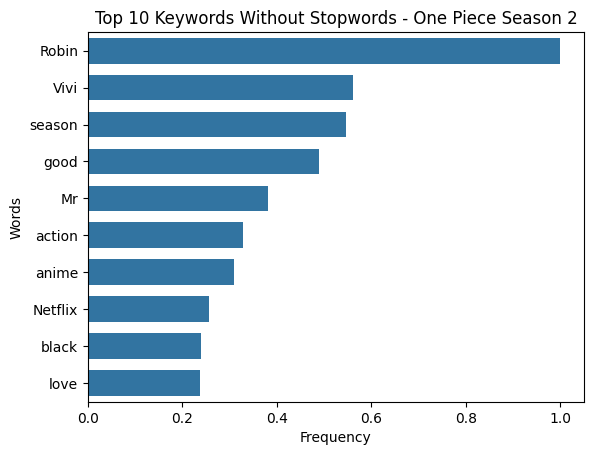

In [127]:
ax = sns.barplot(x = op_s2_top10["Frequency"],
                 y = op_s2_top10["Words"],
                 orient="y",
                 width=.7)
    
bars = ax.containers[0]

plt.title("Top 10 Keywords Without Stopwords - One Piece Season 2")
plt.show()

1. As expected, Robin is the most mentioned character as well as keyword.
2. The keyword, "Mr," means Baroque Works' agents, meaning the audience are excited to see them in reality.

### III. Analysis Based on Mentioned Characters on Comments

In [ ]:
# Before I start investigating further on characters, let's check the frequency of their names mentioned in order

keyword_query = """
SELECT *
FROM op_s2_frequency
WHERE [Words] LIKE '%Mr%'
   OR [Words] LIKE '%Robin%'
   OR [Words] LIKE '%Nico%'
   OR [Words] LIKE '%Igaram%'
   OR [Words] LIKE '%Bon%'
   OR [Words] LIKE '%chan%'
   OR [Words] LIKE '%Vivi%'
   OR [Words] LIKE '%Miss%'
   OR [Words] LIKE '%clay%'
   OR [Words] LIKE '%crocodile%'
"""

characters_list_df = ps.sqldf(keyword_query)

In [129]:
# As expected, Robin is mentioned with highest frequency

characters_list_df

,Words,Frequency
0,Robin,1.000000
1,Vivi,0.560561
2,Mr,0.381381
3,Nico,0.195195
4,Miss,0.171171
5,Igaram,0.107107
6,Bon,0.105105
7,crocodile,0.096096
8,clay,0.071071
9,chan,0.049049


In [ ]:
# I will now extract comments and engagement data for our target characters
# In this case, I will also utilize "Likes" as it can be an important indicator for character marketing 

character_query = """
SELECT [reviews], [Likes], [vader_sentiment_review]
FROM one_piece_yt_df
WHERE [reviews] LIKE '%Mr%'
   OR [reviews] LIKE '%Robin%'
   OR [reviews] LIKE '%Nico%'
   OR [reviews] LIKE '%Igaram%'
   OR [reviews] LIKE '%Bon%'
   OR [reviews] LIKE '%chan%'
   OR [reviews] LIKE '%Vivi%'
   OR [reviews] LIKE '%Miss%'
   OR [reviews] LIKE '%clay%'
   OR [reviews] LIKE '%crocodile%'
   OR [reviews] LIKE '%baroque%'
"""

character_comments_df = ps.sqldf(character_query)

In [131]:
# As reviews reveal, comments related to Igaram received most likes
# The audience thinks his signature movement came to reality is actually funny to watch

character_comments_df.head(4)

,reviews,Likes,vader_sentiment_review
0,Igaram singing while shooting is what sold it ...,6522,Neutral
1,"Igaram be like: ""So anyway, I STARTED BLASTING""",2298,Positive
2,I like how the first trailer focused on Choppe...,2217,Positive
3,The guy they got for Mr. 3 is PERFECT,1835,Positive


In [132]:
# Assessing character sentiment to determine suitability for merchandise vs. meme campaigns before marketing strategy

character_map = {'Nico Robin': 'robin|nico|sunday',
                 'Igaram': 'igaram',
                 'Mr. 3 / Baroque': 'mr\. 3|mr 3|baroque',
                 'Vivi': 'vivi'}

character_sentiment_results = []

for label, pattern in character_map.items():
    char_mask = character_comments_df['reviews'].str.contains(pattern, case=False, na=False)
    char_subset = character_comments_df[char_mask]
    
    if len(char_subset) > 0:
        # Count sentiments first
        positive_count = (char_subset['vader_sentiment_review'] == 'Positive').sum()
        negative_count = (char_subset['vader_sentiment_review'] == 'Negative').sum()
        neutral_count = (char_subset['vader_sentiment_review'] == 'Neutral').sum()
        
        # Calculate the actual percentage
        positive_percent = round((positive_count / len(char_subset)) * 100, 1)
        negative_percent = round((negative_count / len(char_subset)) * 100, 1)
        neutral_percent = round((neutral_count / len(char_subset)) * 100, 1)

    else:
        positive_percent = 0
        negative_percent = 0
        neutral_percent = 0

    # Append with clear, accurate labels
    character_sentiment_results.append({'characters': label, 
                                        'positive': positive_percent,
                                        'negative': negative_percent,
                                        'neutral': neutral_percent})
    
    
character_sentiment_df = pd.DataFrame(character_sentiment_results)

<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Jack Kim\AppData\Local\Temp\ipykernel_24672\2743546959.py:5: SyntaxWarning: invalid escape sequence '\.'
  'Mr. 3 / Baroque': 'mr\. 3|mr 3|baroque',


In [133]:
character_sentiment_df

,characters,positive,negative,neutral
0,Nico Robin,53.9,20.1,26.0
1,Igaram,50.9,17.3,31.8
2,Mr. 3 / Baroque,59.0,15.4,25.5
3,Vivi,39.4,29.5,31.2


In [ ]:
# Now, I can exchange rows and columns for grouped bar chart

character_sentiment_melt_df = pd.melt(character_sentiment_df, id_vars=['characters'], var_name='sentiment', value_name='percentage').sort_values('characters')

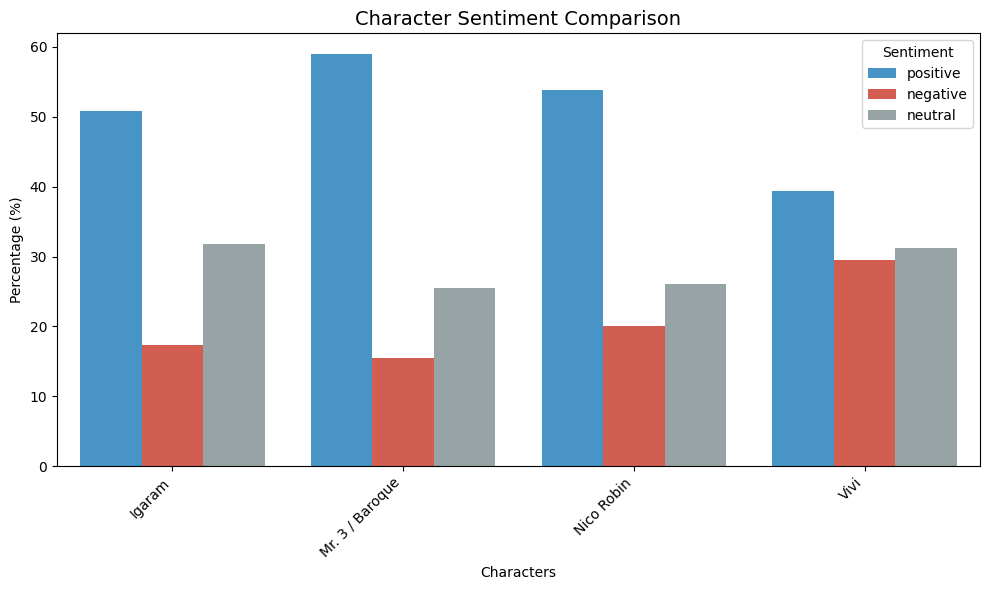

In [135]:
# Creating grouped bar chart to visualize positive vs. negative ratio

plt.figure(figsize=(10, 6))
sns.barplot(data=character_sentiment_melt_df, x='characters', y='percentage', hue='sentiment', palette=['#3498db', '#e74c3c', '#95a5a6'])
plt.title('Character Sentiment Comparison', fontsize=14)
plt.ylabel('Percentage (%)')
plt.xlabel('Characters')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

1. Robin's high positive sentiment confirms 'fan-favorite' status, making her the ideal candidate for a merchandise rollout.
2. With fans highlighting their live-action 'funniness,' Igaram and Baroque Works emerge as ideal catalysts for meme-driven engagement.
3. Vivi’s negative sentiment is 50% above average; this data justifies de-prioritizing her for the March 2026 launch to mitigate negative engagement.

<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:8: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Jack Kim\AppData\Local\Temp\ipykernel_24672\2814734477.py:8: SyntaxWarning: invalid escape sequence '\.'
  'Mr. 3 / Baroque (Meme Strategy)': 'mr\. 3|mr 3|baroque',
C:\Users\Jack Kim\AppData\Local\Temp\ipykernel_24672\2814734477.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


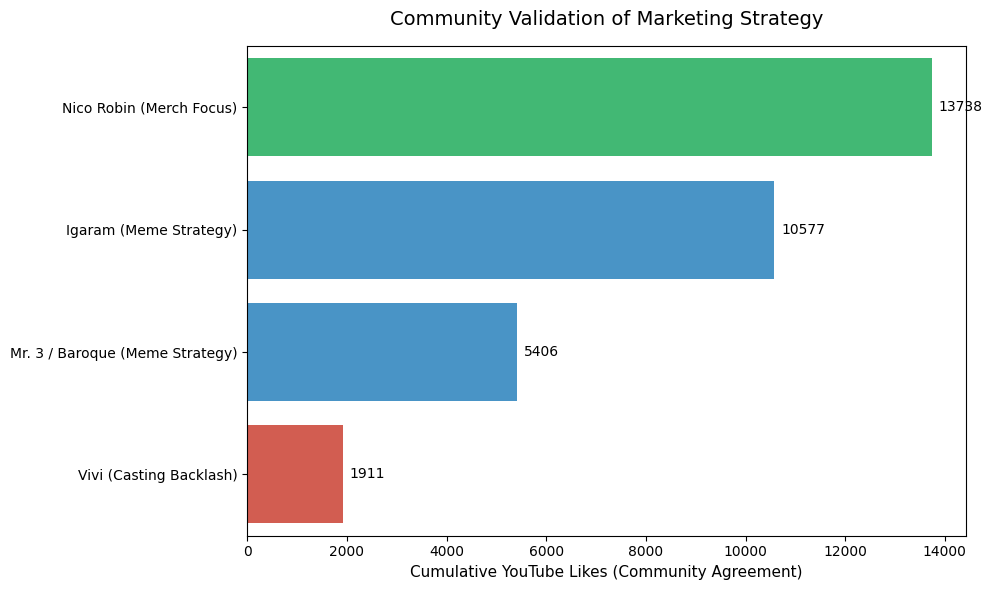

In [ ]:
# Define the specific characters for marketing strategy based on Likes
# For this, I will use regex to catch variations and the specific keywords
# Crocodile received minimal engagement as he was excluded from the trailer, despite being the leader of Baroque Works.
# Hence, included in Baroque Works despite slightly high frequency of mentioning his name (Frequency: 7th, 0.096096).

strategy_map = {'Nico Robin (Merch Focus)': 'robin|nico|sunday',
                'Igaram (Meme Strategy)': 'igaram',
                'Mr. 3 / Baroque (Meme Strategy)': 'mr\. 3|mr 3|baroque',
                'Vivi (Casting Backlash)': 'vivi'}

hype_results = []

for label, pattern in strategy_map.items():
    hype_mask = character_comments_df['reviews'].str.contains(pattern, case=False, na=False)
    total_likes = character_comments_df.loc[hype_mask, 'Likes'].sum()
    
    hype_results.append({'Strategic Pillar': label, 'Total Community Likes': total_likes})

strategy_hype_df = pd.DataFrame(hype_results).sort_values(by='Total Community Likes', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=strategy_hype_df, 
    x = 'Total Community Likes', 
    y = 'Strategic Pillar', 
    palette = ['#2ecc71' if 'Merch' in x else '#3498db' if 'Meme' in x else '#e74c3c' for x in strategy_hype_df['Strategic Pillar']]
)

plt.title('Community Validation of Marketing Strategy', fontsize=14, pad=15)
plt.xlabel('Cumulative YouTube Likes (Community Agreement)', fontsize=11)
plt.ylabel('')

for i in ax.containers:
    ax.bar_label(i, padding=5, fmt='%d')

plt.tight_layout()
plt.show()

## Summary & Conclusion

### I. Season 2 Launch Strategy

By leveraging YouTube community engagement as a proxy for "hype" for characters, I successfully identified three distinct marketing pillars for the March 2026 launch:

1. Merchandise Lead (Robin): High positive sentiment (54%) confirms Nico Robin as the most commercially viable character for physical products.
2. Viral Growth (Igaram & Mr. 3 / Baroque Works): High positivity coupled with "funny" sentiment makes these characters the ideal catalysts for meme-driven social media engagement.
3. Risk Mitigation (Vivi): A negative sentiment rate approximatley 50% higher than the platform average warrants a cautious approach, de-prioritizing Vivi in high-visibility launch promos to protect engagement quality.

### II. Final Recommendations

1. Prioritize Nico Robin in the primary merchandise rollout to maximize conversion.
2. Launch "Meme-First" Social Campaigns using Igaram and Mr. 3 to drive low-cost, high-reach organic growth.
3. Monitor Vivi’s Sentiment Post-Release: Re-evaluate her marketing presence once the audience experiences the live-action performance, rather than just the casting news.